In [1]:
import os
path="train/"
training_data=os.listdir(path)
print(training_data)

['dog.8011.jpg', 'cat.5077.jpg', 'dog.7322.jpg', 'cat.2718.jpg', 'cat.10151.jpg', 'cat.3406.jpg', 'dog.1753.jpg', 'cat.4369.jpg', 'cat.7660.jpg', 'dog.5535.jpg', 'cat.8553.jpg', 'cat.9895.jpg', 'cat.1211.jpg', 'dog.3144.jpg', 'dog.775.jpg', 'dog.11102.jpg', 'cat.6218.jpg', 'dog.11664.jpg', 'dog.3622.jpg', 'cat.1577.jpg', 'cat.12020.jpg', 'dog.5253.jpg', 'cat.7106.jpg', 'cat.8235.jpg', 'cat.952.jpg', 'dog.9469.jpg', 'dog.1035.jpg', 'cat.3360.jpg', 'cat.11529.jpg', 'cat.10637.jpg', 'dog.6982.jpg', 'dog.8777.jpg', 'dog.7444.jpg', 'cat.5711.jpg', 'cat.946.jpg', 'cat.3374.jpg', 'dog.1021.jpg', 'dog.6996.jpg', 'cat.10623.jpg', 'dog.8763.jpg', 'cat.5705.jpg', 'dog.7450.jpg', 'dog.12379.jpg', 'dog.11670.jpg', 'dog.4159.jpg', 'cat.1563.jpg', 'dog.3636.jpg', 'cat.12034.jpg', 'dog.2528.jpg', 'cat.7112.jpg', 'dog.5247.jpg', 'cat.8221.jpg', 'dog.10208.jpg', 'dog.5521.jpg', 'cat.7674.jpg', 'cat.8547.jpg', 'cat.9881.jpg', 'dog.761.jpg', 'dog.3150.jpg', 'cat.1205.jpg', 'dog.11116.jpg', 'cat.9659.jpg',

In [2]:
labels=[]
for x in training_data:
    if 'cat' in x:
        labels.append(0)
    else:
        labels.append(1)

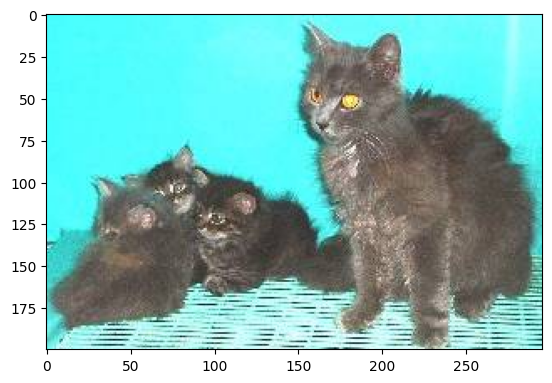

In [3]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as img
cat_image=img.imread("train/cat.101.jpg")
plt.imshow(cat_image)

In [4]:
import PIL
for file_name in training_data:
    img=PIL.Image.open('train/'+file_name)
    img=img.resize((224,224))
    img=img.convert('RGB')
    img.save('resized/'+file_name)

KeyboardInterrupt: 

In [ ]:
import cv2
import numpy as np
cat_dog_images=[]
for file_name in training_data:
    img=cv2.imread('resized/'+file_name)
    cat_dog_images.append(img)
cat_dog_images=np.asarray(cat_dog_images)

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: 4 extraneo

In [ ]:
from sklearn.model_selection import train_test_split
labels = np.asarray(labels)
x_train,x_test,y_train,y_test=train_test_split(cat_dog_images, labels, test_size=0.2,random_state=2)
x_train_scaled=x_train/225
x_test_scaled=x_test/225

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub


mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
model=tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(2)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(x_train_scaled,y_train,epochs=1)

: 

: 